In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## IMPORTANTE!!!!

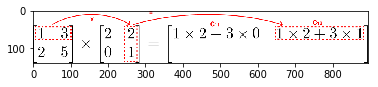

In [29]:
img=mpimg.imread('prod_matriz.png')
imgplot = plt.imshow(img)
plt.show()

In [30]:
streetlights=np.array([[1, 0, 1],
                    [0, 1, 1],
                    [0, 0, 1],
                    [1, 1, 1],
                    [0, 1, 1],
                    [1, 0, 1]
                    ])

In [31]:
walk_vs_stop=np.array([0, 1, 0, 1, 1, 0])

In [32]:
input1 = streetlights[0]
goal_prediction = walk_vs_stop[0]

alpha = 0.1
weights = [0.5, 0.48, -0.7]

for i in range(20):
    prediction=input1.dot(weights)
    error = (goal_prediction-prediction)**2
    delta = prediction - goal_prediction
    
    weights -= alpha*(delta*input1)
    print("Error: {}, Prediction: {}".format(error, prediction))

Error: 0.03999999999999998, Prediction: -0.19999999999999996
Error: 0.025599999999999973, Prediction: -0.15999999999999992
Error: 0.01638399999999997, Prediction: -0.1279999999999999
Error: 0.010485759999999964, Prediction: -0.10239999999999982
Error: 0.006710886399999962, Prediction: -0.08191999999999977
Error: 0.004294967295999976, Prediction: -0.06553599999999982
Error: 0.002748779069439994, Prediction: -0.05242879999999994
Error: 0.0017592186044416036, Prediction: -0.04194304000000004
Error: 0.0011258999068426293, Prediction: -0.03355443200000008
Error: 0.0007205759403792803, Prediction: -0.02684354560000002
Error: 0.0004611686018427356, Prediction: -0.021474836479999926
Error: 0.0002951479051793508, Prediction: -0.01717986918399994
Error: 0.00018889465931478573, Prediction: -0.013743895347199997
Error: 0.00012089258196146188, Prediction: -0.010995116277759953
Error: 7.737125245533561e-05, Prediction: -0.008796093022207963
Error: 4.951760157141604e-05, Prediction: -0.00703687441776

## Learn the whole dataset

In [33]:
for i in range(40):
    error_for_all_lights=0
    for row in range(len(walk_vs_stop)):
        input1=streetlights[row]
        prediction=input1.dot(weights)
        
        error = (goal_prediction-prediction)**2
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
    
        weights -= alpha*(delta*input1)
print("Error: {}, Prediction: {}".format(error_for_all_lights, prediction))
print(weights)

Error: 0.0028384398639797817, Prediction: -0.006249692019824664
[ 0.03188051  0.03201729 -0.03688026]


In [34]:
streetlights.dot(weights)

array([-0.00499975, -0.00486297, -0.03688026,  0.02701754, -0.00486297,
       -0.00499975])

## 6.23  Our First "Deep" Neural Network  

In [35]:
np.random.seed(1)
def relu(x):
    return (x>0) * x

alpha = 0.2
hidden_size = 4

walk_vs_stop = walk_vs_stop.T

# randomly initialed weights
weights_0_1 = 2*np.random.random((3,hidden_size))-1
weights_1_2 = 2*np.random.random((hidden_size,1))-1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))

""" the output of layer_1 is sento through "relu" where
 negative values become 0, This is then th input for the 
 next layer """
layer_2 = np.dot(layer_1,weights_1_2)

print(layer_2)

[0.39194327]


## 6.24  Backpropagation in Code  

In [36]:
np.random.seed(1)
def relux(x):
    return (x>0) * x

def relu2deriv(output):
    return output>0

alpha = 0.2
hidden_size = 4

# randomly initialed weights
weights_0_1 = 2*np.random.random((3,hidden_size))-1
weights_1_2 = 2*np.random.random((hidden_size,1))-1

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T 
for i in range(60):
    layer_2_error=0
    for x in range(len(streetlights)):
        #inpus
        layer_0 = streetlights[x:x+1]
        
        #layer 1: firsts weights
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        
        #layer 2: second Weights
        layer_2 = np.dot(layer_1,weights_1_2)
        
        # calculate the layer 2 error and backpropagate him to adjust the layer 1 weights
        layer_2_error +=np.sum((layer_2 - walk_vs_stop[x:x+1])**2)
        layer_2_delta =(walk_vs_stop[x:x+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
        
        # update the weights        
        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        
    if(i%10==9):
        print("Error: {}".format(layer_2_error))

ValueError: shapes (4,1) and (0,1) not aligned: 1 (dim 1) != 0 (dim 0)

## 6.26  Putting it all together  

In [44]:
np.random.seed(1)  
def relu(x):  
    return (x > 0) * x # returns x if x > 0  
                        # return 0 otherwise  
def relu2deriv(output):  
    return output>0 # returns 1 for input > 0  
                    # return 0 otherwise  
streetlights = np.array( [[ 1, 0,  1 ], 
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )  

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T  
alpha = 0.2  

hidden_size = 4

# randomly initialed weights
weights_0_1 = 2*np.random.random((3,hidden_size))-1
weights_1_2 = 2*np.random.random((hidden_size,1))-1

# Ver a célula importante

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T 
for i in range(60):
    layer_2_error=0
    for x in range(len(streetlights)):
        # update the inputs for each dataset row
        layer_0 = streetlights[x:x+1]
            
        
        #layer 1: firsts weights
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        
        #layer 2: second weights
        layer_2 = np.dot(layer_1,weights_1_2)
        
        # calculate the layer 2 error and backpropagate him to adjust the layer 1 weights
        layer_2_error +=np.sum((layer_2 - walk_vs_stop[x:x+1])**2)
        
        # calculate the gradient decesdent
        layer_2_delta =(layer_2 - walk_vs_stop[x:x+1])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
        
        # update the weights  
        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        
    if(i%10==9):
        print("Error: {}".format(layer_2_error))

Error: 0.6342311598444467
Error: 0.35838407676317513
Error: 0.0830183113303298
Error: 0.006467054957103705
Error: 0.0003292669000750734
Error: 1.5055622665134859e-05


In [47]:
np.random.seed(1)

def relu(x):
    return (x>0)*x

def relu2deriv(output):
    return output>0

streetlights = np.array( [[ 1, 0,  1 ], 
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )  

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T  

alpha = 0.3 # learning rate
hidden_size = 4

# number of cols of streetlights
weights_0_1=2 * np.random.random((3,hidden_size))-1

#number of rows of walk_vs_street
weights_1_2=2 * np.random.random((hidden_size,1))-1

for i in range(120):
    error=0
    for x in range(len(streetlights)):
        layer_0 = streetlights[x:x+1]
        
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)
        
        error += np.sum((layer_2-walk_vs_stop[x:x+1])**2)
        
        layer_2_delta =  layer_2-walk_vs_stop[x:x+1]
        
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*(relu2deriv(layer_1))
        
        # update the weights  
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    
    if i%9==0:
        print("Error: {}".format(error))

Error: 1.4523525897293021
Error: 0.57403647027098
Error: 0.11892199030640659
Error: 0.002113858683464725
Error: 2.249797511093293e-05
Error: 2.171461978716213e-07
Error: 2.067416259373011e-09
Error: 1.9657156988391108e-11
Error: 1.868773237479956e-13
Error: 1.776588964667987e-15
Error: 1.6889499581170738e-17
Error: 1.6056328943495981e-19
Error: 1.5264322982874238e-21
Error: 1.4511642444145558e-23
